Friday
2019-03-01 06:05:05
2019-09-01 05:57:14
183 days 23:52:09
D_maxi = 2.15
D_mini = 0.3
n_dia = 38
Width_maxi = 2.85
Width_mini = 0.4
n_width = 50
[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  5  0  0]
 ...
 [ 0  0  0 ... 52  4  0]
 [ 0  0  0 ... 54  8  2]
 [ 0  0  0 ... 96 24  2]]


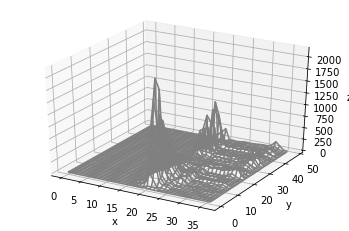

In [3]:
# tämä on harjoitus, Excel tiedostojen käsittely pythonin avulla, spyder- Anaconda
# ensin siis kokeilin anaconda notebook :n sisällä käsittelykäskyt Corey Schafer youtube
# videoiden avulla, ja sitten noita käskyjä voidaan laittaa spyder ympäristössä ohjelmaksi
# ajatus on , että jos tulisi vielä joskus toinen Rulla- aikajana, ei tarvis enää
# tehdä sitä vba ohjelmoinnilla, mutta kun Python on parempi isojen tiedostojen 
# käsittelyssä  ja sitä paitsi koodi on helpompi 
# mutta pitää osata yhdistää peräkkäin tulevia rullia  "set"iksi ohjelman avulla
# Excel issä pelkästään tiedoston lataaminen on käsittämätön pitkä
# ja se yhtälön "alasveto" on p:stä

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

xls=pd.ExcelFile('aika.xlsx')
df=pd.read_excel(xls)


# nimetä sarakkeet uusiksi
df.columns=['Code','Time_1','Time_2','Width','Weight','Diameter', 'Core','Destination']

#muuttaa toisen sarakeen obj string --> date muuttujaksi 
df['Time_2']=pd.to_datetime(df['Time_2'])

#Poistaa toisen aika -sarakkeen
df.drop(columns='Time_2')


# tulostaa yhden date arvon viikonpäivä
print(df.loc[0,'Time_1'].day_name())


#muuttaa yhtä tiettyä arvo: rivi 0, Sarake Time_1 
df.loc[0, 'Time_2']= '2019-03-01 06:05:07'


print(df['Time_1'].min())

print(df['Time_1'].max())


filt=df['Time_1'].max()-df['Time_1'].min()
print(filt)

# muutetaan mm:stä m:iin

df['Core']=df['Core']/1000 

dia_round=round(df['Diameter']*2,-2)/2

df['Diameter']=dia_round/1000 

# Jos ajatellaan Dia on x -axis  ja  Width on y -axis,  pitä laskea jokaiselle koordinaatille 
#  lukumäärään, kuinka paljon on sillä koordinaatilla ollut rullia?

D_maxi= df['Diameter'].max()
print("D_maxi =",D_maxi)
D_mini= df['Diameter'].min()
print("D_mini =",D_mini)

n_dia=int(round((D_maxi-D_mini)/0.05+1,0))


print("n_dia =",n_dia)

Width_round=round(df['Width']*2,-2)/2
df['Width']=Width_round/1000 
Width_maxi= df['Width'].max()
print("Width_maxi =",Width_maxi)
Width_mini= df['Width'].min()
print("Width_mini =",Width_mini)

n_width=int(round((Width_maxi-Width_mini)/0.05+1,0))
print("n_width =",n_width)


# Define variable containing the field With-Dia
DW_array=np.ndarray(shape=(n_dia,n_width), dtype=int)

i=np.linspace(D_mini,D_maxi,n_dia, endpoint=True)
j=np.linspace(Width_mini,Width_maxi,n_width, endpoint=True)


for ii in range(n_dia):
    d_ii=round(i[ii],2)
    # print("ii= ",ii," d_ii= ",d_ii)
    for jj in range(n_width):
        w_jj=round(j[jj],2)
        #print("    jj= ",jj,"  w_jj = ",w_jj)
        filt=((df['Width']==w_jj) & (df['Diameter']==d_ii)) 
        # jostain syystä .loc[True] antoi errorin , joten pakko käyttää false
        DW_array[ii][jj]=87203-filt.value_counts().loc[False]



x=np.arange(0,37,1,np.int64)
y=np.arange(0,49,1,np.int64)


X, Y = np.meshgrid(x, y)

Z=DW_array[X,Y]
print(Z)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='grey')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


# kirjataan ulos excel tiedostoa
df.to_excel(r'aika_1.xlsx', sheet_name='Sheet1', index = False)

